In [1]:
import math
import numpy as np
import tensorflow as tf
#from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from numpy import asarray
from sklearn.datasets import make_multilabel_classification
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from pandas import read_csv
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


2023-06-12 19:16:42.765796: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 19:16:42.795307: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 19:16:42.796665: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 19:16:43.545908: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
# get the dataset
def get_dataset():
    dataframe = pd.read_csv('RGB_Crno_train.csv')
    X = dataframe.iloc[:, :3].values.astype('float')
    y = dataframe.iloc[:, 3].values.astype('float')

    # Initialize the scaler
   # scaler_X = StandardScaler()
   # scaler_y = StandardScaler()

    # Standardize X and y
    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1,1)) # reshape needed because fit_transform expects 2D array
    
    print(scaler_X.mean_)  # prints array of means for all features
    print(scaler_X.scale_)  # prints array of standard deviations for all features
    print(scaler_y.mean_)  # prints mean for the target y
    print(scaler_y.scale_)  # prints standard deviation for the target y


    print(X.shape, y.shape)
    return X, y.ravel()  # ravel() is used to convert y back to 1D array


In [3]:
def train_model():
    x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3)
    x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.3)

    # create a NN with 2 layers of 16 neurons
    model = tf.keras.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(3,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(x_train, y_train, epochs=250, validation_data=(x_validate, y_validate), verbose = 1)

    return model, x_train, y_train

In [4]:
x_values, y_values = get_dataset()

[345.10921502 251.35836177 209.48805461]
[30.63149382  2.68567939  3.79653524]
[843.7337884]
[33.60842753]
(293, 3) (293, 1)


In [5]:
def calculate_mean_std(x_values):
    # Calculate mean and standard deviation for each feature
    mean = np.mean(x_values, axis=0)
    std_dev = np.std(x_values, axis=0)
    
    return mean, std_dev

In [6]:
tf_model, x_train, y_train = train_model()

Epoch 1/250
5/5 [==============================] - 1s 63ms/step - loss: 0.6749 - mae: 0.6272 - val_loss: 0.4329 - val_mae: 0.4874
Epoch 2/250
5/5 [==============================] - 0s 5ms/step - loss: 0.2030 - mae: 0.2967 - val_loss: 0.0596 - val_mae: 0.1773
Epoch 3/250
5/5 [==============================] - 0s 5ms/step - loss: 0.0298 - mae: 0.1165 - val_loss: 0.0112 - val_mae: 0.0878
Epoch 4/250
5/5 [==============================] - 0s 5ms/step - loss: 0.0122 - mae: 0.0907 - val_loss: 0.0227 - val_mae: 0.1175
Epoch 5/250
5/5 [==============================] - 0s 5ms/step - loss: 0.0131 - mae: 0.0908 - val_loss: 0.0068 - val_mae: 0.0686
Epoch 6/250
5/5 [==============================] - 0s 5ms/step - loss: 0.0123 - mae: 0.0879 - val_loss: 0.0115 - val_mae: 0.0859
Epoch 7/250
5/5 [==============================] - 0s 5ms/step - loss: 0.0073 - mae: 0.0717 - val_loss: 0.0054 - val_mae: 0.0594
Epoch 8/250
5/5 [==============================] - 0s 5ms/step - loss: 0.0045 - mae: 0.0554 - va

In [7]:
mean, std_dev = calculate_mean_std(x_train)
for j in range(len(mean)):
    print(f"Feature {j} - Mean: {mean[j]}, Standard Deviation: {std_dev[j]}")


Feature 0 - Mean: 0.04506131763451018, Standard Deviation: 0.9361645731772644
Feature 1 - Mean: 0.007171594262376909, Standard Deviation: 0.9182050488420687
Feature 2 - Mean: 0.04827403203313393, Standard Deviation: 0.9364616558532187


In [8]:

def standardize_data(new_data_point, scaler_X):
    # Reshape new_data_point to 2D because scaler expects 2D inputs
    new_data_point = np.array(new_data_point).reshape(1, -1)
    standardized_data_point = scaler_X.transform(new_data_point)
    return standardized_data_point[0]  # return as 1D array

new_data_point = [320, 249,	207]
standardized_data_point = standardize_data(new_data_point, scaler_X)

# Reshape it to 2D because the model expects 2D inputs
standardized_data_point_2D = np.array(standardized_data_point).reshape(1, -1)


# Predict the target value
Y_pred2 = tf_model.predict(standardized_data_point_2D)

# Inverse-transform the prediction
Y_pred_orig = scaler_y.inverse_transform(Y_pred2)

print(Y_pred_orig)


1/1 [==============================] - 0s 61ms/step
[[816.069]]


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
test_dataframe = pd.read_csv('RGB_Crno_test.csv')

X_test = test_dataframe.iloc[:, :3].values.astype('float')
Y_test = test_dataframe.iloc[:, 3].values.astype('float')

# Standardize X_test and Y_test
X_test = scaler_X.transform(X_test)
Y_test = scaler_y.transform(Y_test.reshape(-1,1))

# Remember to convert Y_test back to a 1D array if necessary
Y_test = Y_test.ravel()

1/1 [==============================] - 0s 14ms/step
[[-0.8231519]]
5/5 [==============================] - 0s 871us/step
Mean Absolute Error: 0.04979084430002207
Mean Squared Error: 0.0033045464447382785
5/5 [==============================] - 0s 951us/step


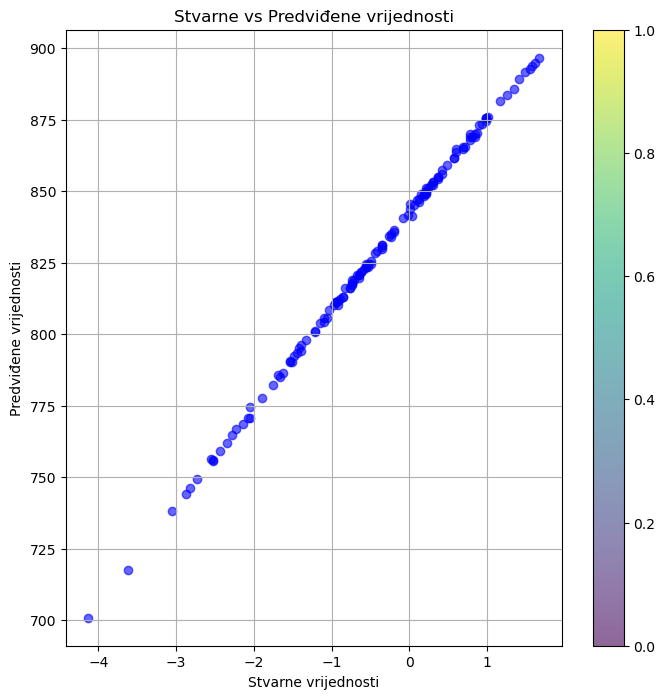

   Mean Absolute Error  Mean Squared Error
0             0.049791            0.003305


In [10]:
newX = tf.convert_to_tensor([standardized_data_point], dtype=tf.float32)
yhat = tf_model.predict(newX)
print(yhat)

# Predictions for the test set
Y_pred = tf_model.predict(X_test)

# Inverse-transform predictions
Y_pred_orig = scaler_y.inverse_transform(Y_pred)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate predictions for the test set
Y_pred = tf_model.predict(X_test)

# Inverse-transform predictions
Y_pred_orig = scaler_y.inverse_transform(Y_pred)

# Create a scatter plot
# Create a scatter plot
c = "blue"
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, Y_pred_orig, c=c, alpha=0.6)
plt.xlabel('Stvarne vrijednosti')
plt.ylabel('Predviđene vrijednosti')
plt.title('Stvarne vs Predviđene vrijednosti')
plt.grid(True)
plt.colorbar() # Show color scale
plt.show()

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame(data=[[mae, mse]], 
                          columns=['Mean Absolute Error', 'Mean Squared Error'])

print(metrics_df)




In [11]:
from everywhereml.code_generators.tensorflow import tf_porter
porter = tf_porter(tf_model, x_train, y_train)
cpp_code = porter.to_arduino(instance_name='ColorRegressionNN_RGB_Crno', arena_size=4096)

print(cpp_code)

INFO:tensorflow:Assets written to: /tmp/tmpepcbkp31/assets


INFO:tensorflow:Assets written to: /tmp/tmpepcbkp31/assets


#ifndef UUID139918962311328
#define UUID139918962311328

#include <EloquentTinyML.h>
#include <eloquent_tinyml/tensorflow.h>

#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

#ifndef ARENA_SIZE
#define ARENA_SIZE 4096
#endif

/** model size = 89260 bytes **/
const unsigned char modelData[] DATA_ALIGN_ATTRIBUTE = { 0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x90, 0x00, 0x00, 0x00, 0xe8, 0x00, 0x00, 0x00, 0xa0, 0x51, 0x01, 0x00, 0xb0, 0x51, 0x01, 0x00, 0x58, 0x5c, 0x01, 0x00, 0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00, 0x10, 0x00, 0x0c, 

2023-06-12 19:16:52.755491: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-06-12 19:16:52.755515: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-06-12 19:16:52.756029: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpepcbkp31
2023-06-12 19:16:52.756966: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-06-12 19:16:52.756977: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpepcbkp31
2023-06-12 19:16:52.760337: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-06-12 19:16:52.761325: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-06-12 19:16:52.791760: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpepcbkp31
2023-06

In [12]:
#cpp_code = porter.to_arduino(instance_name='ColorRegressionNN_RGB', arena_size=4096)

# Specify the file path and name
file_path = 'ColorRegressionNNCrno.txt'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Write the C++ code to the file
    file.write(cpp_code)

print(f"The C++ code has been saved to {file_path}")


The C++ code has been saved to ColorRegressionNNCrno.txt
